# Data Visualization
### Activity 2 -Exploratory Data Analysis I
24th November 2023 <br> Fall 2023

---
### **Group 36:**
Tomás Bensimon - 43022 <br>
Cristina Tiago - 58636 <br>
Martim Esteves - 46953 <br>

---

### Imports & Setup

In [43]:
import os
path = os.path.join(os.getcwd(), 'Dataset')

import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns

# Color Setup

color_pallete = ["#15291C", "#5E5361", "#A697B0", "#EBE9EC",
                 "#97B9C0"]
color_pallete2 = ["#edf8fb", "#b3cde3", "#8c96c6", "#8856a7",
                 "#810f7c"]
sns.set_style("dark")
display(sns.color_palette(color_pallete))
display(sns.color_palette(color_pallete2))
sns.set_palette(sns.color_palette(color_pallete))

[(0.08235294117647059, 0.1607843137254902, 0.10980392156862745),
 (0.3686274509803922, 0.3254901960784314, 0.3803921568627451),
 (0.6509803921568628, 0.592156862745098, 0.6901960784313725),
 (0.9215686274509803, 0.9137254901960784, 0.9254901960784314),
 (0.592156862745098, 0.7254901960784313, 0.7529411764705882)]

[(0.9294117647058824, 0.9725490196078431, 0.984313725490196),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.5490196078431373, 0.5882352941176471, 0.7764705882352941),
 (0.5333333333333333, 0.33725490196078434, 0.6549019607843137),
 (0.5058823529411764, 0.058823529411764705, 0.48627450980392156)]

In [44]:
inflation = pd.read_csv('inflation.csv')
drop_cols = ["Indicator Name", "Indicator Code"]
inflation.drop(drop_cols, axis=1, inplace=True)

inflation = pd.melt(inflation, id_vars=['Country Name','Country Code'], var_name='Year', value_name='Rate')

print(f'Total number of countries and territories: {inflation["Country Name"].nunique()}')
inflation.head()


Total number of countries and territories: 266


,Country Name,Country Code,Year,Rate
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,NaN
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,NaN
4,Angola,AGO,1960,NaN


### General Data Exploration

In [45]:
print('Inflation - ', inflation.shape[0], 'rows and', inflation.shape[1], 'columns')

Inflation -  16492 rows and 4 columns


In [46]:
for column in inflation.columns:
    print(column, '-', inflation[column].dtype)

Country Name - object
Country Code - object
Year - object
Rate - float64


### Missing Values

In [47]:
for column in inflation.columns:
    print(column, '-', inflation[column].isna().sum())

Country Name - 0
Country Code - 0
Year - 0
Rate - 6003


### Intermediary Calculations
- Age - Frequency Distribution

In [48]:
inflation_freq = inflation['Rate'].value_counts().sort_index()
display(inflation_freq)

-18.11      1
-17.64      1
-16.12      1
-13.17      1
-13.06      1
           ..
4145.11     1
4734.91     1
7481.66     1
11749.64    1
23773.13    1
Name: Rate, Length: 9306, dtype: int64

- Age - Range, Outliers, nulls or invalids

In [49]:
inflation_max = inflation['Rate'].max()
inflation_min = inflation['Rate'].min()
inflation_q1 = inflation['Rate'].quantile(0.25)
inflation_q2 = inflation['Rate'].quantile(0.5)
inflation_q3 = inflation['Rate'].quantile(0.75)
inflation_iqr = inflation_q3 - inflation_q1
inflation_outliers = inflation['Rate'][(inflation['Rate'] < inflation_q1 - 1.5 * inflation_iqr) | (inflation['Rate'] > inflation_q3 + 1.5 * inflation_iqr)].count()
inflation_values_count = inflation['Rate'].isnull().sum()

print('Max Inflation Rate:', inflation_max, '\nMin Inflation Rate:', inflation_min, '\nInflation Rate Range:', inflation_max - inflation_min)
print('Q1:', inflation_q1, '\nQ2:', inflation_q2, '\nQ3:', inflation_q3, '\nIQR:', inflation_iqr, '\nNumber of Outliers:', inflation_outliers,
       '({}%)'.format(round((inflation_outliers / inflation['Rate'].notna().sum()) * 100, 2)))

Max Inflation Rate: 23773.13177 
Min Inflation Rate: -18.10863013 
Inflation Rate Range: 23791.24040013
Q1: 2.348641696 
Q2: 4.830950967 
Q3: 9.711421109 
IQR: 7.362779413 
Number of Outliers: 884 (8.43%)


### Plotting
- Rate - Frequency Distribution

<AxesSubplot:xlabel='Rate', ylabel='Count'>

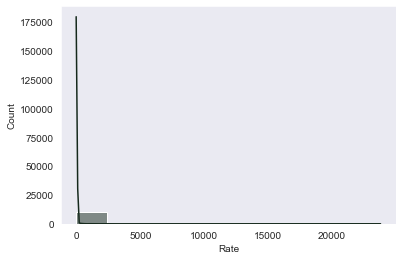

In [50]:
sns.histplot(data=inflation, x=inflation['Rate'], bins= 10, color=color_pallete[0], kde=True)

In [51]:
average_inflation_by_country = inflation.groupby('Country Name')['Rate'].mean().reset_index()

average_inflation_sorted = average_inflation_by_country.sort_values(by='Rate', ascending=False)

print(average_inflation_sorted)

                 Country Name   Rate
49           Congo, Dem. Rep. 675.85
7                      Angola 381.43
29                     Brazil 286.87
26                    Bolivia 229.89
250                   Ukraine 228.30
..                        ...    ...
227  St. Martin (French part)    NaN
246              Turkmenistan    NaN
247  Turks and Caicos Islands    NaN
256                Uzbekistan    NaN
260     Virgin Islands (U.S.)    NaN

[266 rows x 2 columns]


- Age - Range, Outliers, nulls or invalids

<AxesSubplot:>

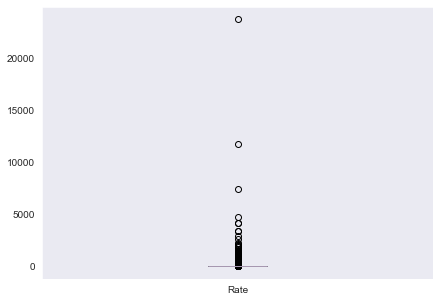

In [52]:
inflation['Rate'].plot(kind='box', figsize=(7, 5))

<AxesSubplot:ylabel='Rate'>

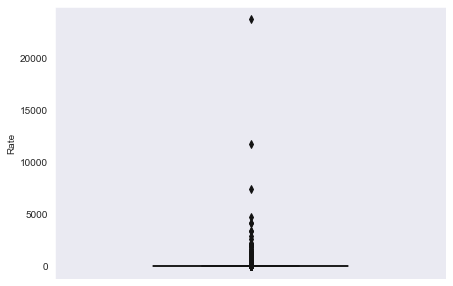

In [53]:
plt.figure(figsize=(7, 5))
sns.boxplot(y=inflation['Rate'], data=inflation, width=0.5)

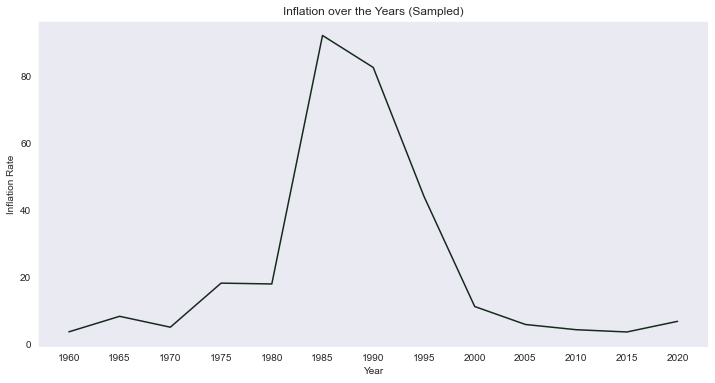

In [54]:
n = 5
sampled_years = inflation['Year'].unique()[::n]

plt.figure(figsize=(12, 6))
sns.lineplot(data=inflation[inflation['Year'].isin(sampled_years)], x='Year', y='Rate', ci=None)
plt.title('Inflation over the Years (Sampled)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.show()

### Data Cleaning

In [55]:
Q1_inflation = inflation['Rate'].quantile(0.25)
Q3_inflation = inflation['Rate'].quantile(0.75)
IQR_inflation = Q3_inflation - Q1_inflation
lower_bound_inflation = Q1_inflation - 1.5 * IQR_inflation
upper_bound_inflation = Q3_inflation + 1.5 * IQR_inflation
inflation_without_outliers = inflation[(inflation['Rate'] > lower_bound_inflation) & (inflation['Rate'] < upper_bound_inflation)]

In [56]:
print(inflation.isnull().sum())

Country Name       0
Country Code       0
Year               0
Rate            6003
dtype: int64


In [57]:
inflation['Rate'] = inflation.groupby('Country Code')['Rate'].transform(lambda x: x.fillna(x.median()))
inflation['Rate'] = inflation['Rate'].fillna(inflation['Rate'].median())
print(inflation.isnull().sum())

Country Name    0
Country Code    0
Year            0
Rate            0
dtype: int64


In [58]:
inflation['Year'] = inflation['Year'].astype(int)

In [59]:
print(inflation['Country Name'].unique())

['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Channel Islands' 'Chile' 'China' "Cote d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Caribbean small states' 'Cuba' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excluding high income)'

In [60]:
inflation.to_csv('inflation_data.csv', index=False)